In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECVUpdate
from src import plotting
from src.utils import select_N_one_standard_error

# Load results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection_update/rfecvP_diffSeeds'
proc = GatherFeatureDatasets(is_p=True)

In [3]:
feature_names = proc.get_feature_names(18, 'dist', False)
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [4]:
feature_plot_names = proc.get_feature_plot_names(18, 'dist')
feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'ratio 5', 'ratio 6',
       'ratio 7', 'ratio 8', 'ratio 9', 'ratio 10', 'ratio 11',
       'ratio 12', 'ratio 13', 'ratio 14', 'ratio 15', 'ratio 16',
       'ratio 17', 'ratio 18', 'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4',
       'amp. 5', 'amp. 6', 'amp. 7', 'amp. 8', 'amp. 9', 'amp. 10',
       'amp. 11', 'amp. 12', 'amp. 13', 'amp. 14', 'amp. 15', 'amp. 16',
       'amp. 17', 'amp. 18', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

In [5]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfecv.json')) as fp:
    rfecv_results_dict = json.load(fp)

In [6]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfe.full.json')) as fp:
    full_rfe_results_dict = json.load(fp)

# Results summary

In [7]:
plotting.set_default_fontsizes()

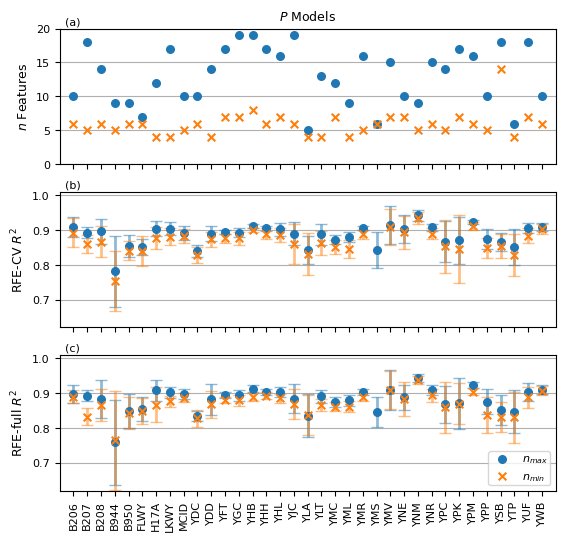

In [8]:
plotting.plot_rfecv_score_summary(rfecv_results_dict, 
                                    full_rfe_results_dict,
                                    capsize=4,
                                    score_ylims=[0.62, 1.01],
                                    grids=True,
                                    elinewidth=2,
                                    s=30,
                                    plot_N=True,
                                    N_ylims=[0, 20],
                                    figsize=(6.4, 6),
                                    #savefigname='../figures/RFE_summary_P.png',
                                    title='$\it{P}$ Models')

# RFECV Results - Best *N*

In [9]:
# Save without filtering out zero rows
best_feat_cnts_df = CustomRFECVUpdate.make_feature_count_df(rfecv_results_dict, 
                                          feature_plot_names,
                                          CustomRFECVUpdate.get_rfecv_important_feature_counts,
                                          filter_zeros=False)
best_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.best.csv'))

best_feat_cnts_df = best_feat_cnts_df.loc[~(best_feat_cnts_df==0).all(axis=1)]

In [10]:
best_feat_cnts_df

,B206,B207,B208,B944,B950,FLWY,H17A,LKWY,MCID,YDC,...,YNM,YNR,YPC,YPK,YPM,YPP,YSB,YTP,YUF,YWB
Feature,,,,,,,,,,,,,,,,,,,,,
ratio 1,0,0,7,4,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ratio 2,0,0,6,0,0,0,5,5,0,0,...,0,0,0,5,0,0,6,2,3,0
ratio 3,0,1,2,1,0,3,2,3,0,0,...,0,0,0,2,0,1,8,1,1,0
ratio 4,2,5,0,0,0,1,0,4,5,0,...,0,0,0,2,0,2,6,3,8,0
ratio 5,0,0,0,2,0,0,0,2,2,0,...,0,0,4,1,6,2,0,2,3,0
ratio 6,0,4,0,0,0,0,2,0,0,5,...,0,4,8,1,7,1,7,0,7,0
ratio 7,3,0,0,0,0,0,1,0,1,2,...,0,0,0,3,0,1,3,0,6,1
ratio 8,7,2,0,1,5,0,1,0,0,4,...,4,0,1,2,0,0,0,0,2,1
ratio 9,5,0,0,5,0,0,2,0,0,6,...,1,3,0,6,4,0,0,1,1,2


In [11]:
best_feat_summary_df = CustomRFECVUpdate.get_feature_cnts_across_stats(best_feat_cnts_df)
best_feat_summary_df

,Feature,cnt
43,distance,350
44,back az.,331
42,depth,301
40,sig. var.,272
18,amp. 1,255
37,sig. dom. amp.,246
19,amp. 2,235
39,sig. max. amp.,204
21,amp. 4,203
20,amp. 3,197


In [12]:
best_feat_summary_df[best_feat_summary_df.cnt > best_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
43,distance,350
44,back az.,331
42,depth,301
40,sig. var.,272
18,amp. 1,255
37,sig. dom. amp.,246
19,amp. 2,235
39,sig. max. amp.,204
21,amp. 4,203
20,amp. 3,197


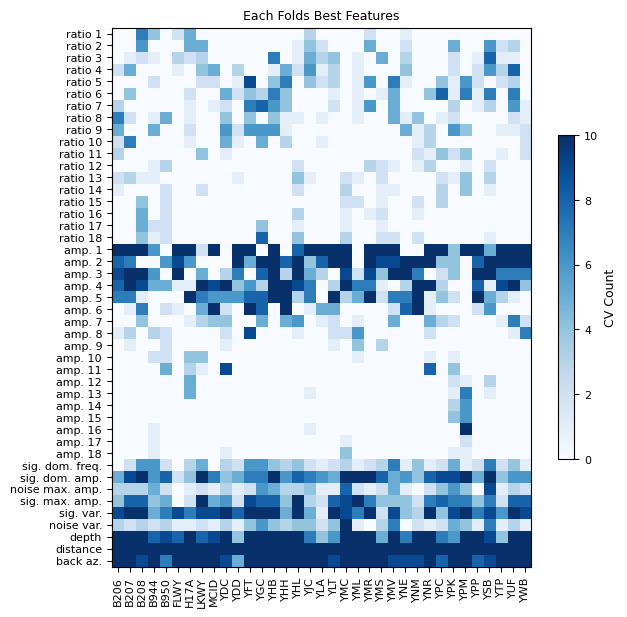

In [13]:
plotting.plot_rfecv_feature_heatmap(best_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds Best Features')

# RFECV Results 1 St. Error *N*

In [14]:
# Save without filtering out zero rows
oste_feat_cnts_df = CustomRFECVUpdate.make_feature_count_df(rfecv_results_dict, 
                      feature_plot_names,
                      CustomRFECVUpdate.get_rfecv_important_feature_counts,
                      oste_feats=True,
                      filter_zeros=False)
oste_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.oste.csv'))
oste_feat_cnts_df = oste_feat_cnts_df.loc[~(oste_feat_cnts_df==0).all(axis=1)]

In [15]:
oste_feat_summary_df = CustomRFECVUpdate.get_feature_cnts_across_stats(oste_feat_cnts_df)
oste_feat_summary_df

,Feature,cnt
40,distance,347
15,amp. 1,243
16,amp. 2,195
37,sig. var.,135
39,depth,121
17,amp. 3,107
18,amp. 4,104
41,back az.,101
34,sig. dom. amp.,99
19,amp. 5,79


In [16]:
oste_feat_summary_df[oste_feat_summary_df.cnt > oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
40,distance,347
15,amp. 1,243
16,amp. 2,195
37,sig. var.,135
39,depth,121
17,amp. 3,107
18,amp. 4,104
41,back az.,101
34,sig. dom. amp.,99
19,amp. 5,79


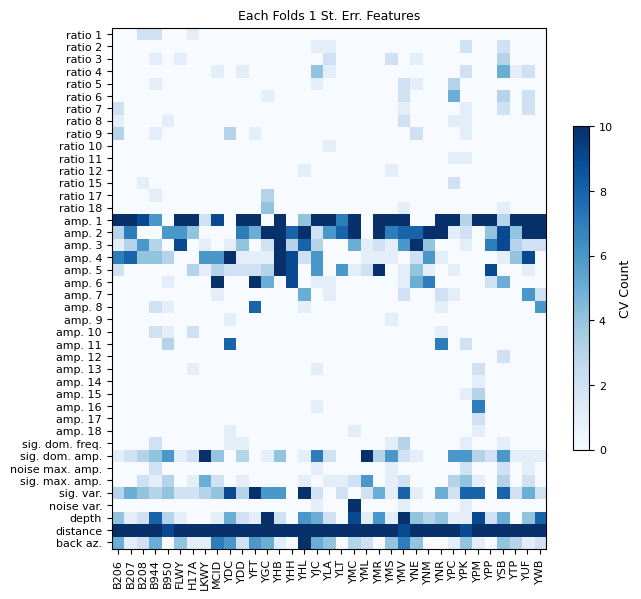

In [17]:
plotting.plot_rfecv_feature_heatmap(oste_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds 1 St. Err. Features')

# Best *N* Selected Features from Full Training Sets

In [18]:
selected_best_features_df = CustomRFECVUpdate.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECVUpdate.get_selected_feature_counts,
                                          filter_zeros=False)
selected_best_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.best.csv'))
selected_best_features_df = selected_best_features_df.loc[~(selected_best_features_df==0).all(axis=1)]

In [19]:
sel_feat_summary_df = CustomRFECVUpdate.get_feature_cnts_across_stats(selected_best_features_df)
sel_feat_summary_df

,Feature,cnt
40,distance,35
41,back az.,34
39,depth,32
37,sig. var.,29
34,sig. dom. amp.,28
17,amp. 1,27
18,amp. 2,25
36,sig. max. amp.,24
20,amp. 4,22
19,amp. 3,20


In [20]:
sel_feat_summary_df[sel_feat_summary_df.cnt > sel_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
40,distance,35
41,back az.,34
39,depth,32
37,sig. var.,29
34,sig. dom. amp.,28
17,amp. 1,27
18,amp. 2,25
36,sig. max. amp.,24
20,amp. 4,22
19,amp. 3,20


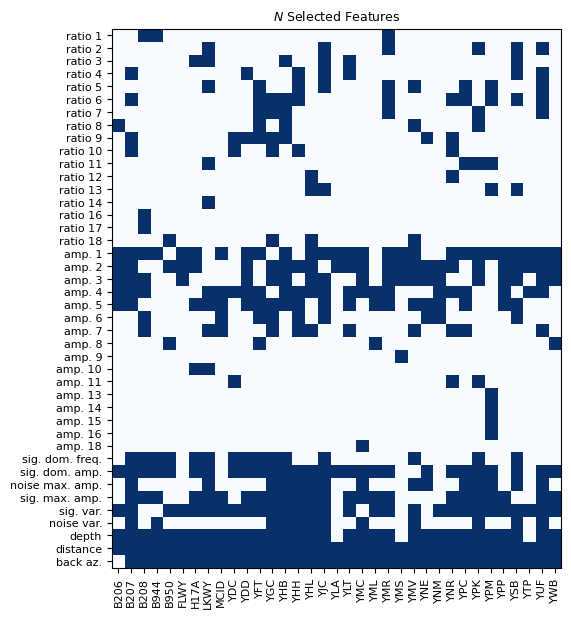

In [21]:
plotting.plot_rfecv_feature_heatmap(selected_best_features_df, 
                                    plot_colorbar=False,
                                    fontsize=8,
                                    figsize=(7, 7),
                                    title='$\it{N}$ Selected Features')

# 1 St. Err. *N* Selected Features from Full Training Sets

In [20]:
selected_oste_features_df = CustomRFECVUpdate.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECVUpdate.get_selected_feature_counts,
                                          oste_feats=True,
                                          filter_zeros=False)
selected_oste_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.oste.csv'))
selected_oste_features_df = selected_oste_features_df.loc[~(selected_oste_features_df==0).all(axis=1)]                                         

YMS N best == N oste


In [21]:
sel_oste_feat_summary_df = CustomRFECVUpdate.get_feature_cnts_across_stats(selected_oste_features_df)
sel_oste_feat_summary_df

,Feature,cnt
27,distance,35
8,amp. 1,26
9,amp. 2,23
28,back az.,18
26,depth,16
24,sig. var.,16
10,amp. 3,11
21,sig. dom. amp.,10
11,amp. 4,9
12,amp. 5,9


In [22]:
sel_oste_feat_summary_df[sel_oste_feat_summary_df.cnt > sel_oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
27,distance,35
8,amp. 1,26
9,amp. 2,23
28,back az.,18
26,depth,16
24,sig. var.,16
10,amp. 3,11


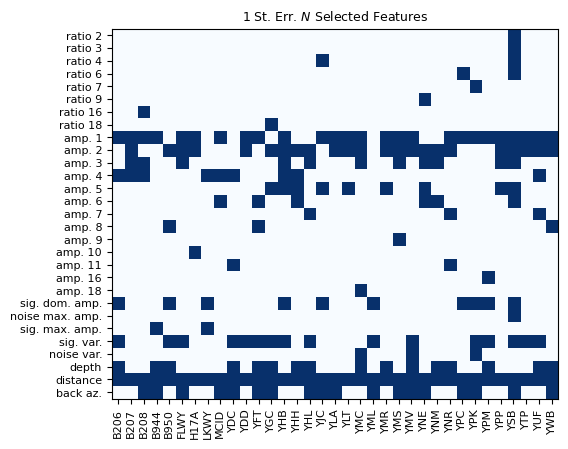

In [23]:
plotting.plot_rfecv_feature_heatmap(selected_oste_features_df, 
                                    plot_colorbar=False,
                                    title='1 St. Err. $\it{N}$ Selected Features')